In [220]:
import sys
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.signal import cwt,ricker
from scipy import stats
from sklearn.preprocessing import StandardScaler,normalize
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.optimizers
from tensorflow.keras.models import Sequential
# from keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.layers import Flatten,concatenate,Layer,Dense,LSTM,Activation,MaxPooling2D,Dropout,Conv2D,BatchNormalization,Reshape,UpSampling2D,ZeroPadding2D

ImportError: cannot import name 'tf2'

In [165]:
random.seed(1314)

def Mean(data):
    return np.mean(data,axis=1)

def Std(data):
    return np.std(data,axis=1)

def Var(data):
    return np.var(data,axis=1)

print(sys.version)

3.6.4 (default, Jul 16 2018, 20:24:48) 
[GCC 6.4.0]


In [ ]:
!pip uninstall keras

Found existing installation: keras 2.9.0
Uninstalling keras-2.9.0:
  Would remove:
    /mnt/ufs18/home-204/minshang/.local/lib/python3.6/site-packages/keras-2.9.0.dist-info/*
    /mnt/ufs18/home-204/minshang/.local/lib/python3.6/site-packages/keras/*
Proceed (Y/n)? 

Preset Data

In [5]:
random_data = np.random.randint(10, size=(10240,100, 1) )

wiki plot: https://en.wikipedia.org/wiki/Activation_function#cite_note-15


library: https://www.tensorflow.org/api_docs/python/tf/keras/activations

graphs:https://mlfromscratch.com/activation-functions-explained/

# Mean

In [6]:
feature_data = Mean(random_data)

In [80]:
# best performance and time: relu ,softplus(the best one, 
# slower but also works:  gelu, swish
# activation functions with exponentials will not work on mean where the points have big slope changes do not fit.
mean_model = None
mean_model = Sequential([
    keras.layers.Flatten(input_shape=(100,1)),
#     keras.layers.Dense(128, activation= 'softplus'),
    keras.layers.Dense(64, activation= 'softplus'),
    keras.layers.Dense(32,activation= 'softplus'),
    keras.layers.Dense(16,activation= 'softplus'),
    keras.layers.Dense(8,activation= 'softplus'),
    keras.layers.Dense(4,activation= 'softplus'),
    keras.layers.Dense(2,activation= 'softplus'),
    keras.layers.Dense(1,activation= 'linear')
    
])

mean_model.compile(optimizer="adam", loss="mean_squared_error")


In [82]:
#mean_model.fit(random_data, feature_data, epochs= 50)

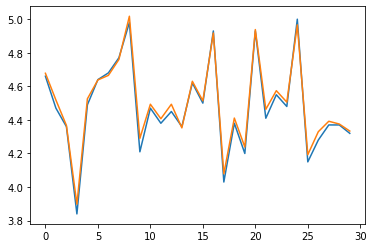

In [83]:
Predirect_arr = np.random.randint(10, size=(30,100, 1))
plt.plot(range(30),np.mean(Predirect_arr, axis=1),range(30),mean_model.predict(Predirect_arr))

In [7]:
mean_LSTMmodel = Sequential()

mean_LSTMmodel.add(LSTM(50,input_shape=(100,1),activation='relu'))
#std_LSTMmodel.add(LSTM(200,activation ='relu'))
mean_LSTMmodel.add(Dense(20, activation ='relu'))
mean_LSTMmodel.add(Dense(1, activation ='linear'))


mean_LSTMmodel.compile(optimizer="adam", loss="mean_squared_error")


In [95]:
mean_LSTMmodel.fit(random_data, feature_data, epochs= 200)

Epoch 1/200
10240/10240 [==============================] - 18s 2ms/step - loss: 0.0017
Epoch 2/200
10240/10240 [==============================] - 16s 2ms/step - loss: 0.0018
Epoch 3/200
10240/10240 [==============================] - 16s 2ms/step - loss: 0.0016
Epoch 4/200
10240/10240 [==============================] - 16s 2ms/step - loss: 0.0015
Epoch 5/200
10240/10240 [==============================] - 16s 2ms/step - loss: 0.0019: 0s - loss: 0.00
Epoch 6/200
10240/10240 [==============================] - 16s 2ms/step - loss: 0.0016
Epoch 7/200
10240/10240 [==============================] - 16s 2ms/step - loss: 0.0016
Epoch 8/200
10240/10240 [==============================] - 16s 2ms/step - loss: 0.0016
Epoch 9/200
10240/10240 [==============================] - 16s 2ms/step - loss: 0.0014
Epoch 10/200
10240/10240 [==============================] - 16s 2ms/step - loss: 0.0013
Epoch 11/200
10240/10240 [==============================] - 16s 2ms/step - loss: 0.0014
Epoch 12/200
10240/10240

KeyboardInterrupt: 

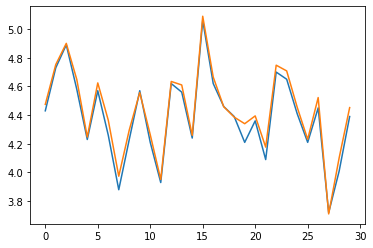

In [16]:
Predirect_arr = np.random.randint(10, size=(30,100, 1))

plt.plot(range(30),np.mean(Predirect_arr, axis=1),range(30),mean_LSTMmodel.predict(Predirect_arr))

In [17]:
mean_LSTMmodel.save("./Models2meanLSTM.h5")

# STD

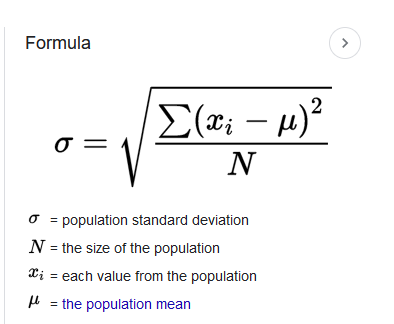

In [206]:
random_data2 = np.random.randint(10, size=(10000,150, 1) )

In [207]:
feature_data = Std(random_data2)

In [86]:
# good performance: 
# not work: softplus elu gelu selu softsign swish tanh
std_model = Sequential([
    keras.layers.Flatten(input_shape=(40,1)),
    #BatchNormalization(),
    keras.layers.Dense(100, activation= 'relu'),
    #BatchNormalization(),
    keras.layers.Dense(200,activation= 'relu'),
    keras.layers.Dense(350,activation= 'relu'),
    #BatchNormalization(),
    keras.layers.Dense(520,activation= 'relu'),
    keras.layers.Dense(300,activation= 'relu'),
    keras.layers.Dense(200,activation= 'relu'),
    #BatchNormalization(),
    keras.layers.Dense(100,activation= 'relu'),
    keras.layers.Dense(50,activation= 'relu'),
    keras.layers.Dense(20,activation= 'relu'),
    keras.layers.Dense(10,activation= 'relu'),
    keras.layers.Dense(4,activation= 'relu'),
    keras.layers.Dense(1,activation= 'linear')
    
])

std_model.compile(optimizer="adam", loss="mean_squared_error")


In [141]:
#std_model.fit(random_data2, feature_data, epochs= 2000)

In [23]:
Predirect_arr = np.random.randint(10, size=(30,40, 1))
plt.plot(range(30),np.std(Predirect_arr, axis=1),range(30),std_model.predict(Predirect_arr))

NameError: name 'std_model' is not defined

In [92]:
std_model.save("./Models/Models2std11hiddenlongwidthfinal.h5")

LSTM model

In [27]:
std_LSTMmodel = Sequential()

std_LSTMmodel.add(LSTM(200,input_shape=(150,1),activation='relu',return_sequences = True))
#std_LSTMmodel.add(Dropout(0.2))
std_LSTMmodel.add(LSTM(200,activation ='relu'))
#std_LSTMmodel.add(Dropout(0.2))
std_LSTMmodel.add(Dense(40, activation ='relu'))
std_LSTMmodel.add(Dense(1, activation ='linear'))

In [28]:
std_LSTMmodel.compile(optimizer="adam", loss="mean_squared_error")

In [49]:
std_LSTMmodel.fit(random_data2, feature_data, epochs= 100)

Epoch 1/100
313/313 [==============================] - 452s 1s/step - loss: 0.0085
Epoch 2/100
313/313 [==============================] - 497s 2s/step - loss: 0.0087
Epoch 3/100
313/313 [==============================] - 504s 2s/step - loss: 0.0085
Epoch 4/100
313/313 [==============================] - 451s 1s/step - loss: 0.0085
Epoch 5/100
313/313 [==============================] - 422s 1s/step - loss: 0.0080
Epoch 6/100
313/313 [==============================] - 451s 1s/step - loss: 0.0083
Epoch 7/100
313/313 [==============================] - 467s 1s/step - loss: 0.0086
Epoch 8/100
313/313 [==============================] - 456s 1s/step - loss: 0.0079
Epoch 9/100
313/313 [==============================] - 443s 1s/step - loss: 0.0080
Epoch 10/100
313/313 [==============================] - 440s 1s/step - loss: 0.0082
Epoch 11/100
313/313 [==============================] - 444s 1s/step - loss: 0.0065
Epoch 12/100
313/313 [==============================] - 436s 1s/step - loss: 0.0061
E

KeyboardInterrupt: 

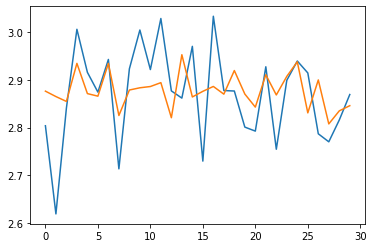

In [53]:
Predirect_arr = np.random.randint(10, size=(30,150, 1))
plt.plot(range(30),np.std(Predirect_arr, axis=1),range(30),std_LSTMmodel.predict(Predirect_arr))

In [54]:
std_LSTMmodel.save("./Models/Models2stdLSTM3 30Input150.h5")

In [213]:
std_LSTMmodel = lm('./Models/Models2stdLSTM3 30Input150.h5')
plt.plot(range(30),np.std(Predirect_arr, axis=1),range(30),std_LSTMmodel.predict(Predirect_arr))

NameError: name 'lm' is not defined

# Variance

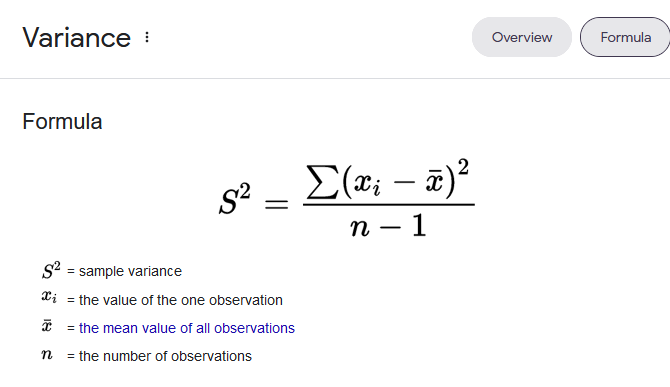

In [113]:
random_data3 = np.random.randint(10, size=(20000,40, 1) )

In [114]:
feature_data = Var(random_data3)

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [115]:
# relu alone does not work when a big change in slope, elu seems working well, swish selu, elu
# not work: softsign, softplus
#var_model = load_model('./Models/Models2var.h5')
var_model = Sequential([
    # kernel_initializer="glorot_uniform"
    keras.layers.Flatten(input_shape=(40,1)),
    #keras.layers.BatchNormalization(),
#     keras.layers.Dense(512,activation= 'swish'),
#     keras.layers.Dense(128,activation= 'relu'),
    keras.layers.Dense(80,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(100,activation= 'selu'),
    keras.layers.Dense(250,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(400,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(350,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(200,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(150,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(120,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(80,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(50,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(30,activation= 'selu'),
    keras.layers.Dense(8,activation= 'selu'),
    
    keras.layers.Dense(1,activation= 'linear'),
    
])

var_model.compile(optimizer="adam", loss="mean_squared_error")

In [140]:
# optimizer = keras.optimizers.Adam()
# var_model.compile(optimizer=optimizer, loss="mean_squared_error")
#var_model.fit(random_data3, feature_data, epochs= 300)

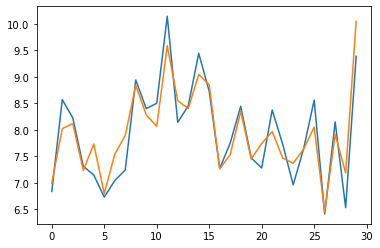

In [156]:
#var_model = load_model('./Models/Models2varfinal.h5')
Predirect_arr = np.random.randint(10, size=(30,40, 1))

plt.plot(range(30),np.var(Predirect_arr, axis=1),range(30),var_model.predict(Predirect_arr))

In [139]:
var_model.save("./Models/Models2varfinal.h5")

# OutPut Mean and Std

In [184]:
random_data4 = np.random.randint(20, size=(10000,100, 1) )

In [185]:
feature_mean =  Mean(random_data4)
feature_std = Std(random_data4)
X_out = np.concatenate([feature_mean, feature_std],axis=1)
print(feature_mean.shape)
print(feature_std.shape)
print(X_out.shape)


(10000, 1)
(10000, 1)
(10000, 2)


In [186]:
mean_std_model = Sequential()

mean_std_model.add(LSTM(20,input_shape=(100,1),activation='relu',return_sequences = True))
#mean_std_model.add(Dropout(0.2))
mean_std_model.add(LSTM(20,activation ='relu',return_sequences = True))
#mean_std_model.add(Dropout(0.2))
mean_std_model.add(LSTM(20,activation ='relu'))
mean_std_model.add(Dense(10, activation ='relu'))

mean_std_model.add(Dense(2, activation ='linear'))

mean_std_model.compile(optimizer="adam", loss="mean_squared_error")

In [187]:
mean_std_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_76 (LSTM)               (None, 100, 20)           1760      
_________________________________________________________________
lstm_77 (LSTM)               (None, 100, 20)           3280      
_________________________________________________________________
lstm_78 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_52 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 22        
Total params: 8,552
Trainable params: 8,552
Non-trainable params: 0
_________________________________________________________________


In [203]:

mean_std_model.fit(random_data4, X_out, epochs= 200)

Epoch 1/200
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0076
Epoch 2/200
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0067
Epoch 3/200
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0063
Epoch 4/200
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0058
Epoch 5/200
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0059
Epoch 6/200
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0052
Epoch 7/200
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0047
Epoch 8/200
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0045
Epoch 9/200
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0042
Epoch 10/200
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0043
Epoch 11/200
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0036
Epoch 12/200
10000/10000 [===============

KeyboardInterrupt: 

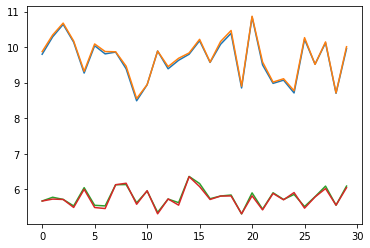

In [204]:
Predirect_arr = np.random.randint(20, size=(30,100, 1))
plt.plot(range(30),np.mean(Predirect_arr, axis=1),range(30),mean_std_model.predict(Predirect_arr).T[0])
plt.plot(range(30),np.std(Predirect_arr, axis=1),range(30),mean_std_model.predict(Predirect_arr).T[1])

In [205]:
mean_std_model.save("./Models2LSTMmean_std.h5")